In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

C:\Users\rajes\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train=pd.read_csv("titanic_train.csv")
test=pd.read_csv("titanic_test.csv")

In [3]:
print("Shape of training Dataset: ",train.shape)
print("Shape of testing Dataset: ",test.shape)
print("Size of Training Dataset: ",train.size)
print("Size of Testing Dataset: ",test.size)

Shape of training Dataset:  (891, 12)
Shape of testing Dataset:  (418, 11)
Size of Training Dataset:  10692
Size of Testing Dataset:  4598


In [4]:
pandas_profiling.ProfileReport(train)

In [5]:
pandas_profiling.ProfileReport(test)

In [6]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [8]:
print(train.info())
print('\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   P

In [9]:
#print(test.Cabin.unique())

In [10]:
train.Cabin= train.Cabin.str.get(0)
test.Cabin= test.Cabin.str.get(0)

In [11]:
num_data=train[['Parch','Age','SibSp','Fare']]
cat_data=train[['Survived','Pclass','Sex','Cabin','Embarked']]

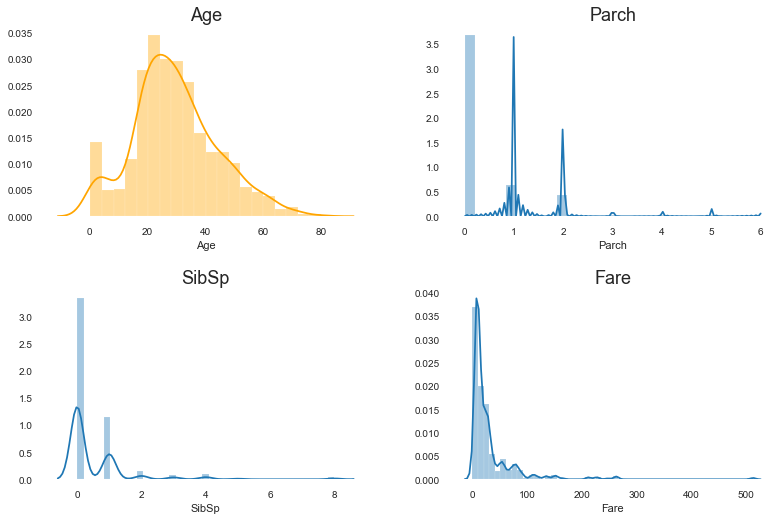

In [12]:
import statsmodels

### Plotting Numerical Data

fig,ax=plt.subplots(2,2, figsize=[12,8])
fig.tight_layout(pad=5.0)


sns.distplot(ax=ax[0,0],a=num_data['Age'].dropna(),color='orange')
ax[0,0].set_title('Age', fontsize=18)

sns.distplot(ax=ax[0,1],a=num_data['Parch'].dropna())
ax[0,1].set_title('Parch',fontsize=18)

sns.distplot(ax=ax[1,0],a=num_data['SibSp'].dropna())
ax[1,0].set_title('SibSp', fontsize=18)

sns.distplot(ax=ax[1,1],a=num_data['Fare'].dropna())
ax[1,1].set_title('Fare',fontsize=18)

plt.show()

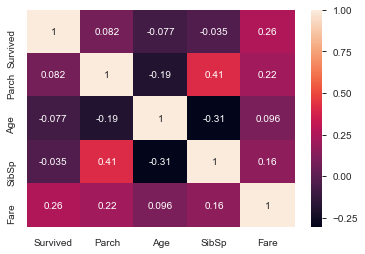

In [13]:
heatmapdata=train[['Survived','Parch','Age','SibSp','Fare']]
sns.heatmap(heatmapdata.corr(),annot=True)
plt.show()

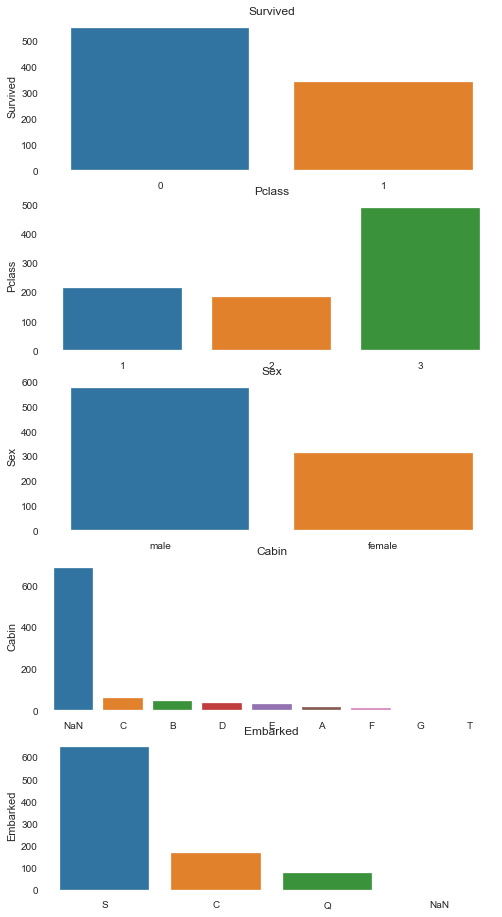

In [14]:
fig, ax = plt.subplots(cat_data.shape[1], 1, figsize = [8,16])
for i, n in enumerate(cat_data):
        sns.barplot(ax = ax[i], x = cat_data[n].fillna('NaN').value_counts().index, y = cat_data[n].fillna('NaN').value_counts())
        ax[i].set_title(n)
plt.show()

In [15]:
print(train.isnull().sum())
print('\n')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [16]:
train['Age'].fillna(train['Age'].median(),inplace= True)
test['Age'].fillna(test['Age'].median(),inplace= True)

train['Fare'].fillna(train['Fare'].median(),inplace= True)
train['Fare'].fillna(train['Fare'].median(),inplace= True)

train.dropna(subset=['Embarked'],inplace=True)
test.dropna(subset=['Embarked'],inplace=True)

In [17]:
print(train.isnull().sum())
print('\n')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [18]:
train.drop(['Cabin'], axis = 1, inplace = True)
test.drop(['Cabin'], axis = 1, inplace = True)

In [26]:
features=['Pclass', 'Sex', 'Parch','SibSp']
y_train=train['Survived']
x_train= pd.get_dummies(train[features])

x_test=pd.get_dummies(test[features])

In [27]:
x_train
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf=RandomForestClassifier(random_state=1, n_estimators=100, max_depth=5)
accuracy= cross_val_score(clf, x_train,y_train, cv=10)



In [30]:
accuracy.mean()

0.789670582226762

In [31]:
accuracy

array([0.75280899, 0.78651685, 0.76404494, 0.84269663, 0.82022472,
       0.75280899, 0.80898876, 0.74157303, 0.82022472, 0.80681818])

In [33]:
clf.fit(x_train,y_train)
y_pred= clf.predict(x_test)

In [34]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [35]:
y_pred.shape

(418,)

In [36]:
x_test.shape

(418, 5)

In [40]:
submission=pd.DataFrame()
submission['PassengerId']= test['PassengerId']
submission['Survived']=y_pred
submission['Survived'].value_counts()

0    271
1    147
Name: Survived, dtype: int64